# Example of SVMs

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from CustomSupportVectorMachine import CustomSVM

In [2]:
%matplotlib inline

In [3]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

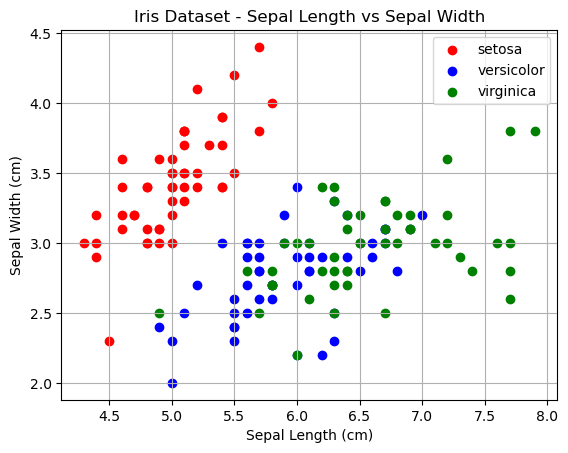

In [9]:
# show more advanced plots
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='green', label='virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from CustomSupportVectorMachine import CustomSVM_OVR

X = df.drop(['target', 'flower_name'], axis=1).values
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = CustomSVM_OVR(learning_rate=0.001, lambda_param=0.01, n_iterations=1000)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.33%


In [11]:
## compare with sklearn's SVM
from sklearn.svm import SVC
sklearn_svm = SVC(kernel='linear', C=1.0)
sklearn_svm.fit(X_train, y_train)
sklearn_accuracy = sklearn_svm.score(X_test, y_test)
print(f"Sklearn SVM Accuracy: {sklearn_accuracy * 100:.2f}%")

Sklearn SVM Accuracy: 96.67%


### Model tuning with regularization and gamma parameters

In SVMs, `lambda_param` (often denoted as `C` in
scikit-learn) controls the regularization, balancing the trade-off between maximizing the margin and minimizing the classification error. A smaller `lambda_param` (larger `C`) means less regularization and a harder
margin, potentially leading to overfitting. A larger
`lambda_param` (smaller `C`) means more regularization
and a softer margin, potentially leading to underfitting.

The `gamma` parameter is specific to kernel functions
like the Radial Basis Function (RBF) kernel. It defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. A small `gamma` means a large influence radius, potentially leading to underfitting. A large `gamma` means a small influence radius, potentially leading to overfitting.

We will perform a simple grid search to find optimal values for `lambda_param` and `gamma`.

In [13]:
# Define parameter grids
lambda_params = [0.001, 0.01, 0.1, 1.0]
gammas = [0.01, 0.1, 1.0, 10.0] # Only relevant for RBF kernel
kernels = ['linear', 'rbf']

best_score = 0
best_params = {}

print("Starting Grid Search for CustomSVM_OVR...")

for kernel in kernels:
    for lambda_param in lambda_params:
        if kernel == 'rbf':
            for gamma in gammas:
                print(f"Testing: kernel={kernel}, lambda_param={lambda_param}, gamma={gamma}")
                svm = CustomSVM_OVR(learning_rate=0.001,
                                    lambda_param=lambda_param, n_iterations=1000,
                                    kernel=kernel, gamma=gamma)
                svm.fit(X_train, y_train)
                score = svm.score(X_test, y_test)
                print(f"Score: {score:.4f}")

                if score > best_score:
                    best_score = score
                    best_params = {'kernel': kernel,'lambda_param': lambda_param, 'gamma': gamma}
        else: # Linear kernel
            print(f"Testing: kernel={kernel}, lambda_param={lambda_param}")
            svm = CustomSVM_OVR(learning_rate=0.001, 
                                lambda_param=lambda_param, 
                                n_iterations=1000,
                                kernel=kernel)
            svm.fit(X_train, y_train)
            score = svm.score(X_test, y_test)
            print(f"Score: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'kernel': kernel,'lambda_param': lambda_param}

print("\nGrid Search Complete.")
print(f"Best Score: {best_score * 100:.2f}%")
print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
print("\nTraining final model with best parameters...")
final_svm = CustomSVM_OVR(learning_rate=0.001,
    n_iterations=1000, **best_params)
final_svm.fit(X_train, y_train)
final_accuracy = final_svm.score(X_test, y_test)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")

Starting Grid Search for CustomSVM_OVR...
Testing: kernel=linear, lambda_param=0.001
Score: 0.9000
Testing: kernel=linear, lambda_param=0.01
Score: 0.9333
Testing: kernel=linear, lambda_param=0.1
Score: 0.7333
Testing: kernel=linear, lambda_param=1.0
Score: 0.7333
Testing: kernel=rbf, lambda_param=0.001, gamma=0.01
Score: 0.9000
Testing: kernel=rbf, lambda_param=0.001, gamma=0.1
Score: 0.9000
Testing: kernel=rbf, lambda_param=0.001, gamma=1.0
Score: 0.9000
Testing: kernel=rbf, lambda_param=0.001, gamma=10.0
Score: 0.9000
Testing: kernel=rbf, lambda_param=0.01, gamma=0.01
Score: 0.9333
Testing: kernel=rbf, lambda_param=0.01, gamma=0.1
Score: 0.9333
Testing: kernel=rbf, lambda_param=0.01, gamma=1.0
Score: 0.9333
Testing: kernel=rbf, lambda_param=0.01, gamma=10.0
Score: 0.9333
Testing: kernel=rbf, lambda_param=0.1, gamma=0.01
Score: 0.7333
Testing: kernel=rbf, lambda_param=0.1, gamma=0.1
Score: 0.7333
Testing: kernel=rbf, lambda_param=0.1, gamma=1.0
Score: 0.7333
Testing: kernel=rbf, lamb

## Conclusion

The grid search for the CustomSVM_OVR model reveals that both the
  linear and RBF kernels achieved a maximum accuracy of 93.33%.


  For the linear kernel, this optimal performance was observed with
  a lambda_param of 0.01.


  For the RBF kernel, multiple combinations of lambda_param (0.001
  and 0.01) and gamma (0.01, 0.1, 1.0, 10.0) also yielded 93.33%
  accuracy.


  The grid search identified the best parameters as
  {'kernel': 'linear', 'lambda_param': 0.01}, leading to a final
  model accuracy of 93.33%. This suggests that for this particular
  dataset and SVM implementation, a linear decision boundary
  is sufficient, and increasing complexity with an RBF kernel did
  not provide a significant performance improvement within the
  tested parameter ranges.